In [1]:
import csv
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from scipy.optimize import root, fsolve
from scipy.special import binom
import pandas as pd

NameError: name 'FF9700' is not defined

In [48]:
class Analytic:
    def __init__(self, p_a, p, p_f, **kwargs):
        self.p_a = p_a
        self.T_idle = 3
        self.T_rts = 3
        self.T_cts = 3
        self.T_ack = 3
        self.T_bo = 3
        self.T_data = 3
        self.T_wait = 3
        self.T_out = 3
        self.T_max = 12
        self.Nr = 3
        self.nodes = 20
        self.__dict__.update(kwargs)
        print(self.__dict__)
        
    def average_time:
        if p_f == 1.:
            p_f = 0.9999999
        elif p_f == 0.:
            p_f = 0.0000001
        total_sum = 0
        for i in range(1, Nr + 1 + 1):
            first_addition = T_wait + T_bo / (1 - p_f)
            numerator = (2**i * T_max + 1) * (p_f ** (2**i * T_max + 1) - 2**i * T_max * p_f - p_f + 2**i * T_max)
            denominator = 2**i * T_max * (1 - p_f ** (2**i * T_max + 1))
            second_addition = (1 - p) * (T_cts + T_data + T_ack)
            huge_sum = T_rts + p * T_out / p_f + first_addition * numerator / denominator + second_addition
            total_sum += p ** (i - 1) * huge_sum
        return T_idle + p_a * total_sum

In [49]:
formulas = Analytic(1, 0, 0)

{'p_a': 1, 'T_idle': 3, 'T_rts': 3, 'T_cts': 3, 'T_ack': 3, 'T_bo': 3, 'T_data': 3, 'T_wait': 3, 'T_out': 3, 'T_max': 12, 'Nr': 3, 'nodes': 20}


In [39]:
formulas.pet

'da'

In [494]:
T_idle = 3.2
T_rts = 3.2
T_cts = 3.2
T_ack = 3.2
T_bo = 3.2
T_data = 32
T_wait = 32
T_out = 32

T_max = 12
p_a = 1

Nr = 3
nodes = 80

In [2]:
T_idle = 3
T_rts = 3
T_cts = 3
T_ack = 3
T_bo = 3
T_data = 3
T_wait = 3
T_out = 3

T_max = 12
p_a = 1

Nr = 3
nodes = 80

### Formulas for exponential backoff

In [3]:
def Etc(p, p_f):
    if p_f == 1.:
        p_f = 0.9999999
    elif p_f == 0.:
        p_f = 0.0000001
    total_sum = 0
    for i in range(1, Nr + 1 + 1):
        first_addition = T_wait + T_bo / (1 - p_f)
        numerator = (2**i * T_max + 1) * (p_f ** (2**i * T_max + 1) - 2**i * T_max * p_f - p_f + 2**i * T_max)
        denominator = 2**i * T_max * (1 - p_f ** (2**i * T_max + 1))
        second_addition = (1 - p) * (T_cts + T_data + T_ack)
        huge_sum = T_rts + p * T_out / p_f + first_addition * numerator / denominator + second_addition
        total_sum += p ** (i - 1) * huge_sum
    return T_idle + p_a * total_sum

In [4]:
pi_rts(0.4, 0.8)

NameError: name 'pi_rts' is not defined

In [5]:
def pi_idle(p, p_f):
    return T_idle / Etc(p, p_f)

def pi_rts(p, p_f):
    total_sum = 0
    for i in range(1, Nr + 1 + 1): 
        numerator = p ** (i - 1) * p_a * T_rts
        denominator = Etc(p, p_f)
        total_sum += numerator / denominator
    return total_sum

def pi_out(p, p_f):
    total_sum = 0
    for i in range(1, Nr + 1 + 1): 
        numerator = p ** (i - 1) * p_a * p * T_out / p_f
        denominator = Etc(p, p_f)
        total_sum += numerator / denominator
    return total_sum

def pi_cts(p, p_f):
    total_sum = 0
    for i in range(1, Nr + 1 + 1): 
        numerator = (1 - p) * p ** (i - 1) * p_a * T_cts
        denominator = Etc(p, p_f)
        total_sum += numerator / denominator
    return total_sum

def pi_bo(p, p_f):
    if p_f == 1.:
        p_f = 0.9999999
    total_sum = 0
    for i in range(1, Nr + 1 + 1): 
        numerator = p ** (i - 1) * p_a * T_bo * (2**i * T_max + 1) * (p_f ** (2**i * T_max + 1) - 2**i * T_max * p_f - p_f + 2**i * T_max)
        denominator = Etc(p, p_f) * (2**i * T_max) * (1 - p_f) * (1 - p_f ** (2**i * T_max + 1))
        total_sum += numerator / denominator
    return total_sum

def pi_wait(p, p_f):
    if p_f == 1.:
        p_f = 0.9999999
    total_sum = 0
    for i in range(1, Nr + 1 + 1): 
        numerator = p ** (i - 1) * p_a * T_wait * (2**i * T_max + 1) * (p_f ** (2**i * T_max + 1) - 2**i * T_max * p_f - p_f + 2**i * T_max)
        denominator = Etc(p, p_f) * (2**i * T_max) * (1 - p_f ** (2**i * T_max + 1))
        total_sum += numerator / denominator
    return total_sum

def pi_data(p, p_f):
    total_sum = 0
    for i in range(1, Nr + 1 + 1): 
        numerator = (1 - p) * p ** (i - 1) * p_a * T_data
        denominator = Etc(p, p_f)
        total_sum += numerator / denominator
    return total_sum

def pi_ack(p, p_f):
    total_sum = 0
    for i in range(1, Nr + 1 + 1): 
        numerator = (1 - p) * p ** (i - 1) * p_a * T_ack
        denominator = Etc(p, p_f)
        total_sum += numerator / denominator
    return total_sum

In [6]:
def pr_success(p):
    total_sum = 0
    for i in range(1, Nr + 1 + 1):
        total_sum += (1 - p) * p ** (i - 1) * p_a
    return total_sum

# alternative formula
def pr_success(p):
    return 1 - p ** (Nr + 1)

def pr_failure(p):
    return p ** (Nr + 1)

In [111]:
def transcendental_equation_p_collision(p, p_f, n):
    p_rts = pi_rts(p, p_f)
    p_cts = pi_cts(p, p_f)
    p_data = pi_data(p, p_f)
    p_ack = pi_ack(p, p_f)
    # We solve transcendental equation f(x) = g(x) by turning it into f(x) - g(x) = 0
#     return p - (1 - (1 - p_rts) ** (n) - n * p_rts * (1 - p_rts) ** (n-1))
#     return p - (1 - (1 - p_rts) ** (2*(n-1))) - (1 - (1 - p_cts) ** (2*(n-1)))
#     return p - (1 - (1 - p_rts) ** ((n-1))) - (1 - (1 - p_cts) ** ((n-1)))
    return p - (1 - (1 - p_rts - p_cts - p_data) ** ((n-1)))

def transcendental_equation_p_free(p, p_f, n):
    p_rts = pi_rts(p, p_f)
    p_cts = pi_cts(p, p_f)
    p_data = pi_data(p, p_f)
    p_ack = pi_ack(p, p_f)
    return p_f - (1 - p_cts) ** (n-1)

def system_of_equations(p_pf, node):
    p, pf = p_pf
    return (transcendental_equation_p_collision(p, pf, node), transcendental_equation_p_free(p, pf, node))

def calculate_p_pf_from_system():
    p_array = []
    pf_array = []
    for node in range(1, nodes+1):
        p, pf = fsolve(system_of_equations, (0.01, 0.01), args=(node))
        p_array.append(p)
        pf_array.append(pf)
    return p_array, pf_array

In [112]:
p_array, p_f_array = calculate_p_pf_from_system()

In [113]:
p_array

[1.8086627663754192e-27,
 0.12107038875724123,
 0.18495190529363198,
 0.2293287162600875,
 0.2638766701560357,
 0.2924139503288502,
 0.31685329132528933,
 0.3382986227616858,
 0.35744930314208023,
 0.3747785926830002,
 0.3906228799386493,
 0.4052305377401693,
 0.4187906004078196,
 0.43145054704305374,
 0.4433278313388819,
 0.4545176373977304,
 0.46509826107210944,
 0.475134943821796,
 0.48468266716501285,
 0.4937882304945658,
 0.5024918233644312,
 0.510828233889741,
 0.5188277904756254,
 0.5265171049314992,
 0.5339196655337083,
 0.5410563151987889,
 0.547945640651395,
 0.554604291878657,
 0.5610472464333118,
 0.5672880297024494,
 0.5733388997183033,
 0.5792110031891935,
 0.5849145080028936,
 0.5904587163607049,
 0.595852161865766,
 0.6011026932391255,
 0.6062175468283216,
 0.6112034096739617,
 0.6160664745823644,
 0.6208124883958649,
 0.6254467944550086,
 0.6299743700733998,
 0.6343998597187096,
 0.6387276044802136,
 0.6429616683139889,
 0.6471058614823837,
 0.6511637615424343,
 0.6551

In [17]:
# v1 
(1 - (1 - pi_rts(p_array[19], p_f_array[19])) ** ((20-1))), (1 - (1 - pi_cts(p_array[19], p_f_array[19])) ** ((20-1)))

(0.2920885667968596, 0.16916359636320955)

In [18]:
# v2
(1 - (1 - pi_rts(p_array[19], p_f_array[19]) - pi_cts(p_array[19], p_f_array[19])))

0.02772297736156526

In [19]:
pi_rts(p_array[19], p_f_array[19]), pi_cts(p_array[19], p_f_array[19])

(0.018016582508086385, 0.009706394853478881)

In [20]:
pl = 0.3213524779132122
pfl = 0.793511691939903
pi_rts(pl, pfl) * Etc(pl, pfl), pi_cts(pl, pfl)

(4.373415398075117, 0.014528321813474757)

In [21]:
pl = 0.46720884645036903
pfl = 0.793511691939903
pi_rts(pl, pfl), pi_cts(pl, pfl)

(0.01697006254247895, 0.009041499197816745)

In [22]:
5.35515985928278 / 322.7055157738169

0.016594571823297224

In [23]:
2.8536719649313773 / (1 - pl)

5.356079855904645

In [787]:
p_f_array

[1.0,
 0.9614148725011759,
 0.9406642181316062,
 0.9262291982868748,
 0.915035900954207,
 0.9058472268133532,
 0.8980358835245534,
 0.8912367838482018,
 0.8852171941197794,
 0.8798188539621594,
 0.8749288286166359,
 0.8704634571509738,
 0.8663588861148317,
 0.8625651761889662,
 0.8590424684308113,
 0.8557583979340676,
 0.8526862947542353,
 0.8498038993029561,
 0.8470924241311691,
 0.8445358550521834,
 0.8421204214276723,
 0.8398341884361642,
 0.8376667388589237,
 0.8356089216939856,
 0.8336526512528136,
 0.8317907450112243,
 0.8300167914997117,
 0.8283250417512078,
 0.8267103194048009,
 0.8251679457199163,
 0.8236936766055346,
 0.8222836494172335,
 0.8209343377349699,
 0.8196425127266226,
 0.81840520996592,
 0.8172197008006931,
 0.8160834675373554,
 0.8149941818420915,
 0.8139496858739999,
 0.8129479757205973,
 0.811987186842493,
 0.8110655812010454,
 0.8101815358620305,
 0.809333532867743,
 0.8085201502116549,
 0.8077400537735464,
 0.8069919900931504,
 0.8062747798846092,
 0.805587312

In [197]:
Etc(0.4715554774858431, 0.7952306484442072)

373.48744053324293

In [98]:
pc = 0.5
pf = 0.8

In [99]:
prts = pi_rts(pc, pf)
prts

0.015767857799425286

In [100]:
P_tr = 1 - (1 - prts) ** (nodes)
P_tr

0.5482718165856967

In [101]:
P_s = (nodes * prts * (1 - prts) ** (nodes - 1)) / (P_tr)
P_s

0.6599733827182248

In [102]:
Ew = 1 / P_tr - 1
Ew

0.8239128289091926

In [103]:
tp = 0.1 
T_s = T_rts + T_cts + T_data + T_ack + 4 * tp
T_f = T_rts + tp
T_s, T_f

(8.4, 1.1)

In [104]:
Ep = 20

In [105]:
S = (P_s * Ep) / (Ew + P_s * T_s + (1 - P_s) * T_f)
S

1.9578787826602935

In [875]:
def S(p, p_f, nodes):
    prts = pi_rts(p, p_f)
    pcts = pi_cts(p, p_f)
    pdata = pi_data(p, p_f)
    P_tr = 1 - (1 - prts) ** (nodes)
    print(P_tr)
    P_s = (nodes * prts * (1 - prts) ** (nodes - 1)) / (P_tr)
    Ew = 1 / P_tr - 1
    tp = 0.
#     Ep = T_data
    Ep = 100
#     T_s = T_rts + T_cts + T_data + T_ack + 4 * tp
#     T_f = T_rts + tp
    T_s = 4 * 100
    T_f = 100
    S = (P_s * Ep) / (Ew + P_s * T_s + (1 - P_s) * T_f)
    print(P_s, Ep, "\t\t", P_s * Ep)
    print(Ew, "\t\t", Ew)
    print(P_s, T_s, "\t\t", P_s * T_s)
    print(1 - P_s, T_f, "\t\t", (1 - P_s) * T_f)
    return S

In [116]:
def S2(p, p_f, nodes):
    prts = pi_rts(p, p_f)
    pcts = pi_cts(p, p_f)
    pdata = pi_data(p, p_f)
    P_tr = 1 - (1 - prts - pcts - pdata) ** (nodes)
    pr_s = pr_success(p)
    Ew = 1 / P_tr - 1
    pr_f = pr_failure(p)
    tp = 0.
    T_s = T_rts + T_cts + T_data + T_ack + 4 * tp
    T_f = T_rts + tp
    numerator = T_s * pr_s
    denominator = T_rts * Ew + T_s * pr_s + T_f * pr_f
    S = numerator / denominator
    return S

In [117]:
S2(0.701418511710132, 0.73480790420354, 62)

0.8125898097549638

In [878]:
(1 - P_tr) / P_tr

0.8239128289091926

In [110]:
for i in range(len(p_array)):
    print(S(p_array[i], p_f_array[i], i+1))

0.17295933656067797
0.24390864987602667
0.28404154189687747
0.31141377145048876
0.33190452167204454
0.34809126622146985
0.3613403745320684
0.3724652096876618
0.381988838855853
0.39026684799859246
0.3975513736608287
0.4040272512850501
0.40983369997348046
0.4150779714157155
0.41984428388366735
0.4241998638999414
0.4281991465599565
0.4318867660818451
0.4352997296707389
0.43846902686220085
0.44142084043263197
0.4441774708435952
0.44675805127865303
0.4491791072979589
0.45145499962533725
0.4535982779442757
0.4556199661600159
0.45752979433144775
0.45933638870433513
0.46104742853395675
0.4626697763661675
0.464209586943574
0.4656723987741618
0.46706321154280295
0.46838655188980155
0.46964652957411046
0.47084688564465255
0.47199103393420544
0.4730820969464593
0.47412293701301894
0.4751161834427334
0.47606425625960397
0.4769693870279729
0.4778336371779195
0.4786589141800597
0.4794469858624807
0.4801994931177445
0.4809179612103215
0.4816038098636638
0.4822583622800864


In [59]:
((160 + 128) / 1000000) * 1000 * 1000

288.00000000000006

In [11]:
prt = pi_rts(p_array[9], p_f_array[9])
prt

0.023728874830785954

In [12]:
1 - (1 - prt) ** (10) - 10 * prt * (1 - prt) ** (9)

0.022323427120735456

In [13]:
(1 - prt) ** (10)

0.786510355786292

In [14]:
10 * prt * (1 - prt) ** (9)

0.19116621709297252

In [15]:
analytics_headers = [
    'nodes',
    'p_collision',
    'p_success',
    'p_failure',
    'p_free',
    'cycle_time',
    'p_bo',
    'p_wait',
    'p_rts',
    'p_out',
    'p_cts',
    'p_data',
    'p_ack',
    'bo_time',
    'wait_time',
    'rts_time',
    'out_time',
    'cts_time',
    'data_time',
    'ack_time',
]

In [86]:
data = [analytics_headers]
for i in range(nodes):
    data.append([
        i + 1,
        p_array[i],
        p_success(p_array[i]),
        p_failure(p_array[i]),
        p_f_array[i],
        Etc(p_array[i], p_f_array[i]),
        pi_bo(p_array[i], p_f_array[i]),
        pi_wait(p_array[i], p_f_array[i]),
        pi_rts(p_array[i], p_f_array[i]),
        pi_out(p_array[i], p_f_array[i]),
        pi_cts(p_array[i], p_f_array[i]),
        pi_data(p_array[i], p_f_array[i]),
        pi_ack(p_array[i], p_f_array[i]),
        pi_bo(p_array[i], p_f_array[i]) * Etc(p_array[i], p_f_array[i]),
        pi_wait(p_array[i], p_f_array[i]) * Etc(p_array[i], p_f_array[i]),
        pi_rts(p_array[i], p_f_array[i]) * Etc(p_array[i], p_f_array[i]),
        pi_out(p_array[i], p_f_array[i]) * Etc(p_array[i], p_f_array[i]),
        pi_cts(p_array[i], p_f_array[i]) * Etc(p_array[i], p_f_array[i]),
        pi_data(p_array[i], p_f_array[i]) * Etc(p_array[i], p_f_array[i]),
        pi_ack(p_array[i], p_f_array[i]) * Etc(p_array[i], p_f_array[i]),
    ])

In [87]:
# Draw table to evaluate the results
data_pd = {}
for i in range(1, len(data[0])):
    data_pd[data[0][i]] = np.array(data[1:]).T[i]
df1 = pd.DataFrame(data_pd, index=np.arange(1, len(np.array(data[1:]).T[0])+1))
df1

,p_collision,p_success,p_failure,p_free,cycle_time,p_bo,p_wait,p_rts,p_out,p_cts,p_data,p_ack,bo_time,wait_time,rts_time,out_time,cts_time,data_time,ack_time
1,1.808663e-27,1.000000,1.070115e-107,1.000000,52.525587,0.714425,7.144248e-08,0.057115,1.033018e-28,0.057115,0.057115,0.057115,37.525583,0.000004,3.000000,5.425988e-27,3.000000,3.000000,3.000000
2,8.660267e-02,0.999944,5.625034e-05,0.958659,72.562287,0.754106,3.117585e-02,0.045261,4.088777e-03,0.041341,0.041341,0.041341,54.719655,2.262191,3.284257,2.966910e-01,2.999831,2.999831,2.999831
3,1.410750e-01,0.999604,3.960957e-04,0.934718,90.348258,0.772326,5.041873e-02,0.038643,5.832348e-03,0.033192,0.033192,0.033192,69.778281,4.555245,3.491355,5.269425e-01,2.998812,2.998812,2.998812
4,1.819036e-01,0.998905,1.094876e-03,0.917863,106.399434,0.781842,6.421806e-02,0.034427,6.822838e-03,0.028165,0.028165,0.028165,83.187542,6.832765,3.663034,7.259461e-01,2.996715,2.996715,2.996715
5,2.151348e-01,0.997858,2.142113e-03,0.904857,121.272338,0.787367,7.491223e-02,0.031451,7.477624e-03,0.024685,0.024685,0.024685,95.485883,9.084781,3.814124,9.068289e-01,2.993574,2.993574,2.993574
6,2.434344e-01,0.996488,3.511783e-03,0.894302,135.302635,0.790804,8.358652e-02,0.029204,7.949474e-03,0.022095,0.022095,0.022095,106.997818,11.309477,3.951362,1.075585e+00,2.989465,2.989465,2.989465
7,2.682311e-01,0.994823,5.176504e-03,0.885457,148.695466,0.793038,9.083674e-02,0.027428,8.308778e-03,0.020071,0.020071,0.020071,117.921132,13.507012,4.078433,1.235478e+00,2.984470,2.984470,2.984470
8,2.903900e-01,0.992889,7.110932e-03,0.877882,161.583728,0.794533,9.702714e-02,0.025978,8.593109e-03,0.018434,0.018434,0.018434,128.383601,15.678007,4.197612,1.388507e+00,2.978667,2.978667,2.978667
9,3.104796e-01,0.990708,9.292490e-03,0.871287,174.058276,0.795552,1.023975e-01,0.024764,8.824629e-03,0.017075,0.017075,0.017075,138.472363,17.823126,4.310420,1.536000e+00,2.972123,2.972123,2.972123
10,3.288959e-01,0.988299,1.170129e-02,0.865477,186.184036,0.796253,1.071142e-01,0.023729,9.017372e-03,0.015925,0.015925,0.015925,148.249563,19.942957,4.417938,1.678891e+00,2.964896,2.964896,2.964896


In [88]:
# Here we save our table to csv in the same folder
with open('2021-04-08-01.csv', "wt", newline="") as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(analytics_headers)
    for i in range(1, len(data)):
        writer.writerow(data[i])

In [17]:
s = 0
for i in range(1, 21):
    s += i
    print(s)

1
3
6
10
15
21
28
36
45
55
66
78
91
105
120
136
153
171
190
210


In [18]:
s

210

In [73]:
simpc = 0.4663487125083911
simpf = 0.7931865846302574
t1 = pi_idle(simpc, simpf) + pi_bo(simpc, simpf) + pi_rts(simpc, simpf)
t2 = pi_cts(simpc, simpf) + pi_data(simpc, simpf) + pi_ack(simpc, simpf)
t3 = pi_out(simpc, simpf) + pi_wait(simpc, simpf)
t1 + t2 + t3

1.0

In [71]:
vc = 0.4731246508351256
vf = 0.8260981839009207
Etc(vc, vf)

307.9090475329297

In [29]:
s = 0
for i in range(9, 13):
    s += i
print(s)

42


In [30]:
s = 0
for i in range(13, 16):
    s += i
print(s)

42


In [31]:
s = 0
for i in range(16, 18):
    s += i
print(s)

33


In [32]:
s = 0
for i in range(18, 20):
    s += i
print(s)

37


In [33]:
s = 0
for i in range(20, 21):
    s += i
print(s)

20


In [61]:
cp = 0.11111884767821734
cf = 0.957330465104775

In [65]:
Etc(cp, cf) * pi_out(cp, cf)

0.3916852250936333

In [24]:
# СОХРАНЕНИЕ С NPY В CSV
threads = 12

name = '2021_05_03_03'
fullname = 'results/npy/' + name
tt = np.load(fullname + '_0.npy')
for th in range(1, threads):
    ct = np.load(fullname + f'_{th}.npy')
    tt = np.concatenate((tt, ct))
    
    
stats_headers = [
    'nodes',
    'p_collision',
    'p_failure',
    'p_success',
    'p_free',
    'p_busy',
    'p_rts_rts',
    'p_rts_cts',
    'p_rts_data',
    'p_free_v2',
    'saturation',
    'cycle_time',
    'idle_time',
    'bo_time',
    'rts_time',
    'cts_time',
    'data_time',
    'ack_time',
    'out_time',
    'wait_time',
]

    
with open(f'results/csv/{name}.csv', "wt", newline="") as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(stats_headers)
    for ttt in tt:
        writer.writerow(list(ttt))

In [25]:
data = [stats_headers]
for i in range(len(tt)):
    data.append(tt[i])
 

In [26]:
data_pd = {}
for i in range(1, len(data[0])):
    data_pd[data[0][i]] = np.array(data[1:]).T[i]
df1 = pd.DataFrame(data_pd, index=np.arange(1, len(np.array(data[1:]).T[0])+1))
df1

,p_collision,p_failure,p_success,p_free,p_busy,p_rts_rts,p_rts_cts,p_rts_data,p_free_v2,saturation,cycle_time,idle_time,bo_time,rts_time,cts_time,data_time,ack_time,out_time,wait_time
1,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.228623,52.487947,3.0,37.487947,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
2,0.111530,0.000149,0.999851,0.957369,0.042631,0.055672,0.055858,0.0,0.963330,0.293361,81.798055,3.0,63.330839,3.376088,2.999553,2.999553,2.999553,0.376535,2.715933
3,0.160624,0.000625,0.999375,0.931335,0.068665,0.085254,0.075371,0.0,0.941049,0.353605,101.714422,3.0,80.039237,3.571839,2.998124,2.998124,2.998124,0.573716,5.535259
4,0.198484,0.001487,0.998513,0.912255,0.087745,0.108722,0.089761,0.0,0.924833,0.400818,119.557855,3.0,94.716066,3.737355,2.995539,2.995539,2.995539,0.741816,8.376000
5,0.230044,0.002770,0.997230,0.896645,0.103355,0.129434,0.100610,0.0,0.911810,0.441084,135.693282,3.0,107.713648,3.885530,2.991691,2.991691,2.991691,0.893840,11.225191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.743969,0.306210,0.693790,0.733399,0.266601,0.649243,0.094725,0.0,0.790110,0.850549,743.829098,3.0,567.499822,8.129571,2.081370,2.081370,2.081370,6.048201,152.907394
77,0.746455,0.310580,0.689420,0.733382,0.266618,0.652894,0.093561,0.0,0.790084,0.850431,748.869394,3.0,571.438298,8.157364,2.068261,2.068261,2.068261,6.089103,153.979846
78,0.749367,0.315516,0.684484,0.733745,0.266255,0.657103,0.092264,0.0,0.790293,0.849906,754.022660,3.0,575.630719,8.192858,2.053453,2.053453,2.053453,6.139405,154.899317
79,0.752123,0.320382,0.679618,0.733527,0.266473,0.660868,0.091255,0.0,0.790140,0.850029,757.840294,3.0,578.507177,8.225198,2.038854,2.038854,2.038854,6.186344,155.805012


In [27]:
p_collision_sim = np.array(data[1:]).T[1]
p_collision_sim

array([0.        , 0.11153006, 0.16062445, 0.19848367, 0.23004387,
       0.25703679, 0.28101026, 0.30259215, 0.3219919 , 0.33902182,
       0.35601861, 0.37207153, 0.38649549, 0.40011787, 0.41266994,
       0.42507911, 0.4358507 , 0.44676097, 0.45738893, 0.46697702,
       0.47680756, 0.48614389, 0.49499078, 0.50364919, 0.51177877,
       0.5199291 , 0.52731171, 0.53487173, 0.54187951, 0.54907918,
       0.55590722, 0.5629198 , 0.56871265, 0.57493733, 0.58138204,
       0.58682317, 0.59279914, 0.59841484, 0.60366   , 0.60897188,
       0.61429347, 0.61896851, 0.6241131 , 0.62864761, 0.63389043,
       0.63836302, 0.64298245, 0.64728931, 0.65182021, 0.65607796,
       0.66039034, 0.66433326, 0.66862209, 0.67247657, 0.67584964,
       0.68020277, 0.68404627, 0.68747451, 0.69060034, 0.69457557,
       0.69843597, 0.70141851, 0.70483056, 0.70843457, 0.71120678,
       0.71446001, 0.71710491, 0.72088856, 0.72380595, 0.7264395 ,
       0.72947002, 0.73237985, 0.73546134, 0.73812391, 0.74108

In [28]:
np.array(data[1:]).T[0]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80.])

In [103]:
p_free_sim = np.array(data[1:]).T[9]
p_free_sim2 = np.array(data[1:]).T[4]
p_free_sim

array([1.        , 0.9633298 , 0.94104853, 0.92483348, 0.91181012,
       0.9008919 , 0.89168583, 0.88391191, 0.87691486, 0.8703527 ,
       0.86502246, 0.86006006, 0.85545991, 0.85143881, 0.8473837 ,
       0.8438804 , 0.84047037, 0.83739384, 0.83450208, 0.83151729,
       0.82940679, 0.82687326, 0.8247585 , 0.82275771, 0.82065135,
       0.81896399, 0.81711654, 0.81551016, 0.81393367, 0.81258125,
       0.81119928, 0.80995509, 0.80849209, 0.80733548, 0.80631541,
       0.80524883, 0.80419129, 0.80324555, 0.80234059, 0.80148049,
       0.80061124, 0.79972596, 0.79915862, 0.79840323, 0.79778914,
       0.79709749, 0.79648312, 0.79610361, 0.79550067, 0.79499116,
       0.79473175, 0.79417458, 0.79377071, 0.79331691, 0.79297648,
       0.79271723, 0.79235735, 0.79206694, 0.79154466, 0.79168433,
       0.79152147, 0.79127052, 0.7908609 , 0.79073404, 0.79047434,
       0.79050532, 0.79029289, 0.79024996, 0.79030341, 0.78998976,
       0.79000315, 0.7899748 , 0.79004799, 0.79010837, 0.79004

In [30]:
saturation_sim = np.array(data[1:]).T[10]
saturation_sim

array([0.2286228, 0.2933612, 0.3536052, 0.400818 , 0.4410844, 0.4755322,
       0.5051998, 0.5305604, 0.5537906, 0.5753144, 0.593883 , 0.6106514,
       0.6265656, 0.6406714, 0.6540808, 0.6662072, 0.6786396, 0.68871  ,
       0.6989152, 0.7089598, 0.7168458, 0.7254326, 0.7328096, 0.7397886,
       0.7473582, 0.7529096, 0.7597314, 0.7654242, 0.7706528, 0.7755974,
       0.780635 , 0.7849028, 0.7898704, 0.7940038, 0.7977678, 0.8014538,
       0.804816 , 0.8083332, 0.8115006, 0.8145332, 0.8175362, 0.8204414,
       0.8225036, 0.825121 , 0.8274488, 0.8297026, 0.8316734, 0.8329176,
       0.8348022, 0.8365736, 0.8377696, 0.839792 , 0.8408152, 0.8423312,
       0.8432736, 0.8438528, 0.8455648, 0.8462424, 0.8470104, 0.8471024,
       0.8479608, 0.8481632, 0.8498504, 0.8500296, 0.8509944, 0.8506104,
       0.8512816, 0.8511712, 0.85148  , 0.8518408, 0.8517512, 0.851988 ,
       0.8513168, 0.8514096, 0.850936 , 0.8505488, 0.8504312, 0.8499064,
       0.8500288, 0.849692 ])

In [31]:
p_failure_sim = np.array(data[1:]).T[2]
p_success_sim = np.array(data[1:]).T[3]

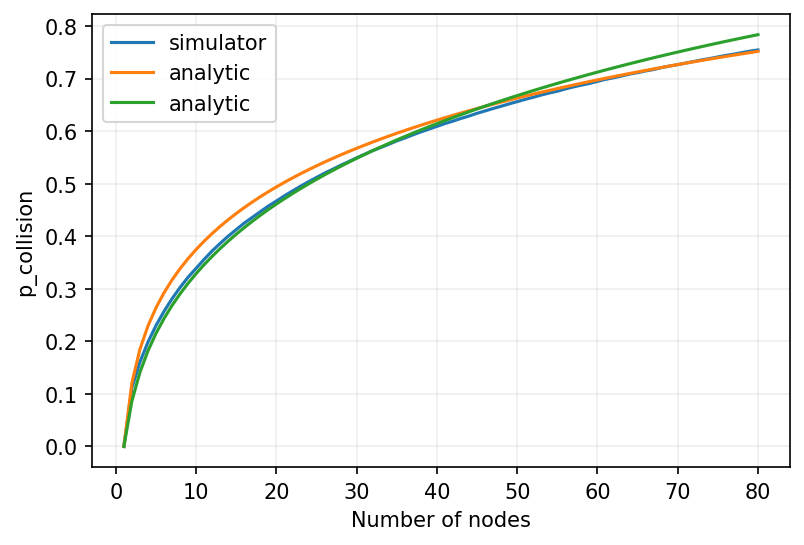

In [137]:
plt.figure(dpi=150)
# plt.plot(np.arange(1, 51), dataold, label='old')
plt.plot(np.arange(1, 81), p_collision_sim, label='simulator')
plt.plot(np.arange(1, 81), p_array, label='analytic')
plt.plot(np.arange(1, 81), p_array2, label='analytic')
# plt.plot(np.arange(1, 31), p3, label='analytic Emil')
plt.xlabel('Number of nodes')
plt.ylabel(data[0][1])
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [78]:
with np.printoptions(suppress=True):
    print(np.fabs(p_collision_sim - p_array) / p_array)

[1.         0.07879987 0.13153396 0.13450146 0.12821443 0.12098314
 0.11312187 0.10554721 0.0991956  0.09540773 0.0885874  0.08182752
 0.07711519 0.07262172 0.06915399 0.06476872 0.06288469 0.05971772
 0.0563126  0.05429699 0.05111379 0.0483222  0.04594396 0.04343243
 0.04146859 0.03904808 0.03765689 0.03557954 0.03416421 0.03209807
 0.03040379 0.02812655 0.02769953 0.02628699 0.02428476 0.02375554
 0.02213464 0.02092359 0.02013821 0.01907277 0.01783257 0.01747033
 0.01621495 0.01578136 0.01410853 0.01351067 0.01256414 0.01198131
 0.01094591 0.01022009 0.00931073 0.00885726 0.00779421 0.0072863
 0.00739716 0.00598476 0.00524073 0.00502132 0.00515909 0.00399995
 0.00294018 0.00306499 0.00251086 0.00162317 0.00184469 0.00132864
 0.00160222 0.0002349  0.00001714 0.00013574 0.00034521 0.00071046
 0.00135802 0.00148239 0.002053   0.00257209 0.00259513 0.00323254
 0.00370015 0.0034856 ]


In [80]:
with np.printoptions(suppress=True):
    print(np.fabs(p_collision_sim - p_array2) / p_array2)

[1.         0.28783624 0.13857495 0.09114762 0.0693012  0.05587708
 0.04764233 0.0420199  0.03707921 0.03078763 0.02917212 0.02841735
 0.02613043 0.02423934 0.02175462 0.02073212 0.01737642 0.0157625
 0.01470168 0.01241155 0.01160658 0.01059006 0.00932215 0.00836525
 0.00698635 0.00622888 0.00452492 0.00365884 0.00221578 0.00155164
 0.00059797 0.00033397 0.00174902 0.002738   0.00304975 0.00479565
 0.00536088 0.00628051 0.00757124 0.00852024 0.00923832 0.01078903
 0.01139001 0.01276873 0.01285918 0.01398298 0.01471582 0.01577078
 0.01633587 0.01717151 0.01778876 0.01882274 0.01921946 0.02013236
 0.02162288 0.02158114 0.02216856 0.02324229 0.02463702 0.02473264
 0.02490021 0.0262001  0.02681075 0.02707177 0.02838931 0.02896467
 0.03028416 0.02998771 0.03078544 0.03188705 0.03238676 0.03297797
 0.03327654 0.0340606  0.034395   0.03476051 0.035585   0.03580038
 0.03616154 0.03716002]


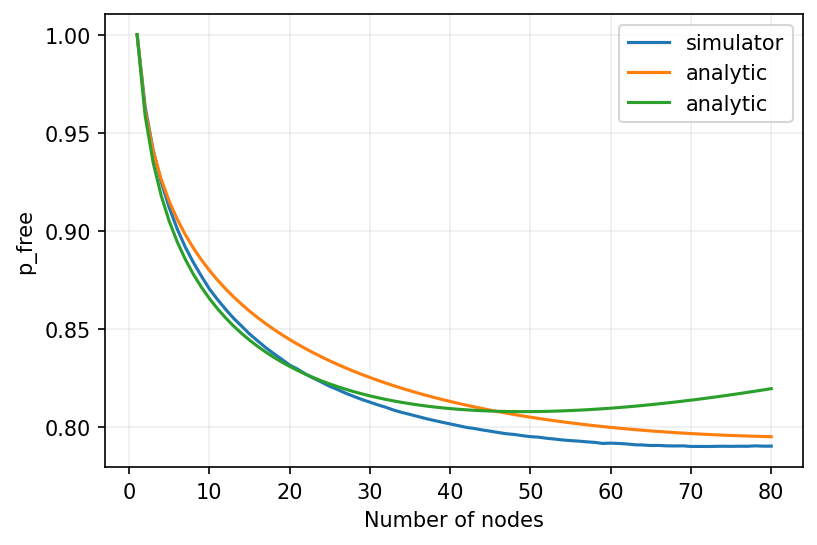

In [105]:
plt.figure(dpi=150)
# plt.plot(np.arange(1, 51), dataold, label='old')
plt.plot(np.arange(1, 81), p_free_sim, label='simulator')
plt.plot(np.arange(1, 81), p_f_array, label='analytic')
plt.plot(np.arange(1, 81), p_f_array2, label='analytic')
# plt.plot(np.arange(1, 31), p3, label='analytic Emil')
plt.xlabel('Number of nodes')
plt.ylabel(data[0][4])
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [63]:
np.max(np.fabs(p_free_sim - p_f_array) / p_f_array)

0.015595582987819996

In [142]:
def S2(p, p_f, nodes):
    prts = pi_rts(p, p_f)
    pcts = pi_cts(p, p_f)
    pdata = pi_data(p, p_f)
    pack = pi_ack(p, p_f)
    
    
    P_tr = 1 - ((1 - prts - pcts - pdata) ** (nodes))
#     print(P_tr)
#     P_s = (nodes * prts * (1 - prts) ** (nodes - 1) + nodes * pcts * (1 - pcts) ** (nodes - 1)) / (P_tr)
#     Ew = 1 / P_tr - 1
    
#     print(prts, pcts, pdata, pack, prts + pcts + pdata + pack)
#     P_tr = 1 - (1 - prts) ** (nodes) - (1 - pcts) ** (nodes)
    P_nontr = (1 - prts) ** (nodes) + (1 - pcts) ** (nodes)
#     print(P_nontr)
    pr_s = pr_success(p)
#     print(P_s, pr_s)
    Ew = T_rts * (1 / P_tr - 1)
#     Ew = 1 / P_nontr
    pr_f = pr_failure(p)
    tp = 0.
    T_s = T_rts + T_cts + T_data + T_ack + 4 * tp
    T_f = T_rts + tp
    numerator = T_s * pr_s
    denominator = Ew + T_s * pr_s + T_f * pr_f
#     print(T_s * pr_s)
#     print(T_rts * Ew, T_s * pr_s, T_f * pr_f)
    S = numerator / denominator
    return S

In [125]:
pi_rts(0, 1), pi_cts(0, 1), pi_data(0, 1), pi_ack(0, 1)

(0.05711502085288688,
 0.05711502085288688,
 0.05711502085288688,
 0.05711502085288688)

In [36]:
ptr = pi_rts(0, 1) + pi_cts(0, 1) + pi_data(0, 1) + pi_ack(0, 1)
ptr

0.22846008341154753

In [37]:
ptr * Etc(0, 1)

12.0

In [38]:
S2(p_array[19], p_f_array[19], 20)

0.4300976497931889
0.018016582508086385 0.009706394853478881 0.009706394853478881 0.009706394853478881 0.04713576706852303
1.5179292659028656


NameError: name 'P_s' is not defined

In [143]:
sat_analytic = []
for i in range(len(p_array)):
    sat_analytic.append(S2(p_array[i], p_f_array[i], i+1))

In [144]:
sat_aloha = np.array([0.2104248, 0.3575784, 0.4625044, 0.5403576, 0.5982632, 0.643912 ,
       0.6787328, 0.7050928, 0.7257056, 0.7405756, 0.7504416, 0.7577156,
       0.760588 , 0.7617796, 0.7606672, 0.75634  , 0.75155  , 0.743706 ,
       0.7345156, 0.725766 , 0.7156652, 0.703044 , 0.6916032, 0.6784316,
       0.6661048, 0.651482 , 0.637232 , 0.622544 , 0.608732 , 0.5939332,
       0.577594 , 0.5628964, 0.548042 , 0.5323976, 0.5179232, 0.502466 ,
       0.4871036, 0.4730412, 0.4583936, 0.4444448, 0.4303692, 0.4159196,
       0.401668 , 0.3891508, 0.3754112, 0.36306  , 0.3505472, 0.338016 ,
       0.3263124, 0.3146024, 0.302784 , 0.2920208, 0.2808512, 0.2700528,
       0.2609312, 0.2507552, 0.240936 , 0.2320256, 0.2226832, 0.2137888,
       0.205192 , 0.1967856, 0.1893056, 0.1818352, 0.1741392, 0.1670224,
       0.1605184, 0.1532352, 0.148168 , 0.140848 , 0.135168 , 0.12916  ,
       0.1244704, 0.1182528, 0.1127856, 0.1089792, 0.1045152, 0.0994048,
       0.0954432, 0.0910976])

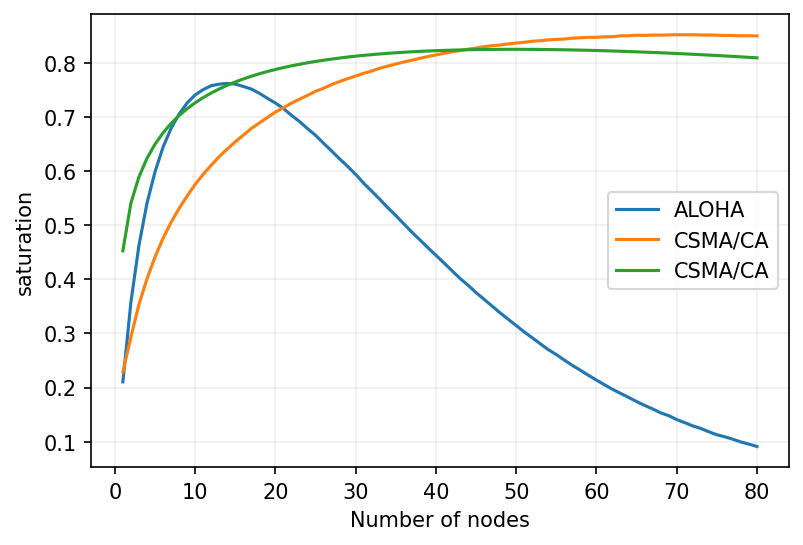

In [145]:
plt.figure(dpi=150)
# plt.plot(np.arange(1, 51), dataold, label='old')
plt.plot(np.arange(1, 81), sat_aloha, label='ALOHA')
plt.plot(np.arange(1, 81), saturation_sim, label='CSMA/CA')
plt.plot(np.arange(1, 81), sat_analytic, label='CSMA/CA')
# plt.plot(np.arange(1, 31), p3, label='analytic Emil')
plt.xlabel('Number of nodes')
plt.ylabel(data[0][10])
plt.grid(alpha=0.2)
plt.legend(loc=5)
plt.show()

In [129]:
ps_analytic = []
for i in range(len(p_array)):
    ps_analytic.append(pr_success(p_array[i]))
ps_analytic = np.array(ps_analytic)

ps_analytic2 = []
for i in range(len(p_array2)):
    ps_analytic2.append(pr_success(p_array2[i]))
ps_analytic2 = np.array(ps_analytic2)


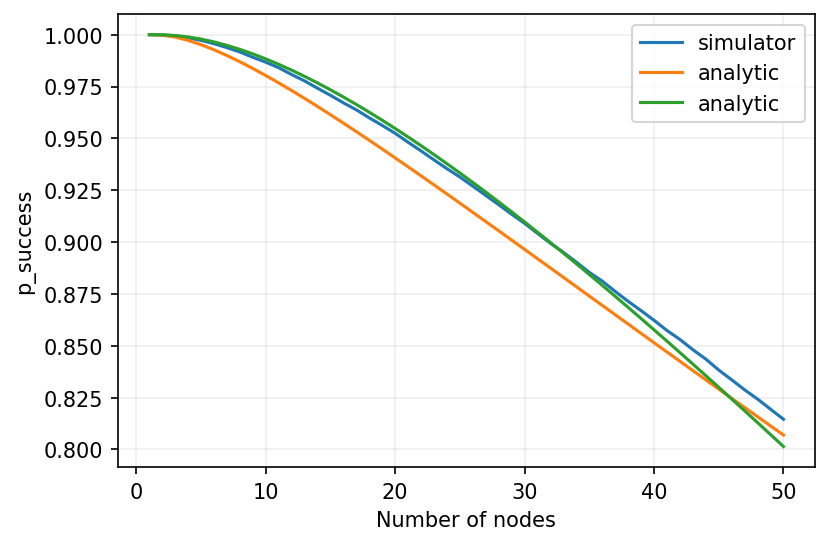

In [109]:
plt.figure(dpi=150)
plt.plot(np.arange(1, 81)[:50], p_success_sim[:50], label='simulator')
plt.plot(np.arange(1, 81)[:50], ps_analytic[:50], label='analytic')
plt.plot(np.arange(1, 81)[:50], ps_analytic2[:50], label='analytic')
plt.xlabel('Number of nodes')
plt.ylabel(data[0][3])
plt.grid(alpha=0.2)
plt.legend()
plt.show()

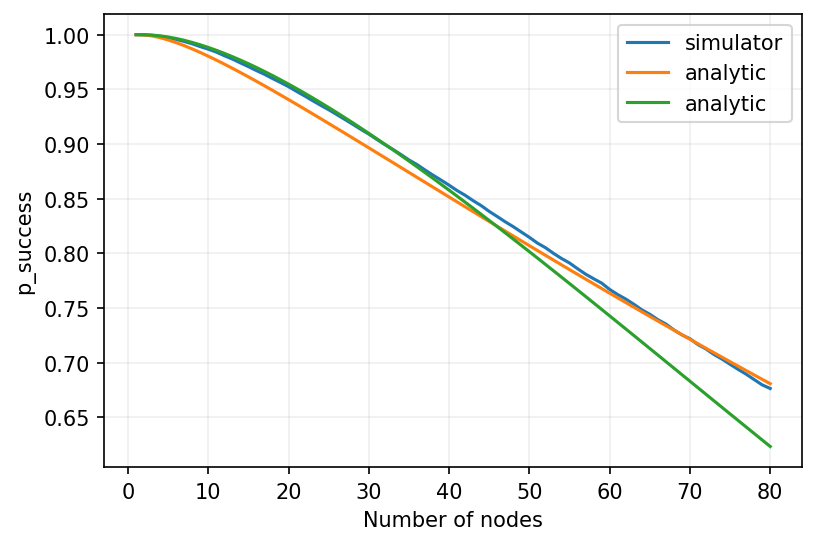

In [110]:
plt.figure(dpi=150)
plt.plot(np.arange(1, 81), p_success_sim, label='simulator')
plt.plot(np.arange(1, 81), ps_analytic, label='analytic')
plt.plot(np.arange(1, 81), ps_analytic2, label='analytic')
plt.xlabel('Number of nodes')
plt.ylabel(data[0][3])
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [62]:
np.max(np.fabs(p_success_sim - ps_analytic) / ps_analytic)

0.014016883518290507

In [929]:
nodes_distrib = []
b = 0
rang = np.arange(50, 81)
ma = np.sum(rang) / 6
for i in range(len(rang)):
    b += rang[i]
    if b >= ma:
        nodes_distrib.append(rang[i])
        b = 0

In [334]:
ma

335.8333333333333

In [288]:
nodes_distrib

[56, 62, 68, 73, 78]

In [397]:
nodes_distrib = [[51, 56], [57, 62], [63, 67], [68, 72], [73, 76], [77, 80]]

In [398]:
[list(range(i, j+1)) for i, j in nodes_distrib]

[[51, 52, 53, 54, 55, 56],
 [57, 58, 59, 60, 61, 62],
 [63, 64, 65, 66, 67],
 [68, 69, 70, 71, 72],
 [73, 74, 75, 76],
 [77, 78, 79, 80]]

In [399]:
ma = np.mean([sum(range(i, j+1)) for i, j in nodes_distrib])
ma

327.5

In [400]:
[sum(range(i, j+1)) for i, j in nodes_distrib]

[321, 357, 325, 350, 298, 314]

In [401]:
[abs(sum(range(i, j + 1)) - ma) for i, j in nodes_distrib]

[6.5, 29.5, 2.5, 22.5, 29.5, 13.5]

In [319]:
abs(np.sum(np.arange(50, 55 + 1)) - ma)

20.833333333333314

In [320]:
abs(np.sum(np.arange(56, 61 + 1)) - ma)

15.166666666666686

In [321]:
abs(np.sum(np.arange(62, 66 + 1)) - ma)

15.833333333333314

In [322]:
abs(np.sum(np.arange(67, 71 + 1)) - ma)

9.166666666666686

In [323]:
abs(np.sum(np.arange(72, 76 + 1)) - ma)

34.166666666666686

In [324]:
abs(np.sum(np.arange(77, 80 + 1)) - ma)

21.833333333333314